In [ ]:

# Install AutoKeras
!pip3 install autokeras

In [71]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import autokeras as ak
from sklearn import model_selection

### Getting and preparing the spam dataset 

Clean the dataset renaming the relevant columns and removing the unnecessary ones

In [72]:
emails_dataset = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Automated-Machine-Learning-with-Auto-Keras/main/spam.csv", encoding="latin-1")
emails_dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
emails_dataset.rename(columns = {'v1': 'spam', 'v2': 'message'}, inplace = True)
emails_dataset['spam'] = emails_dataset['spam'].map({'ham': 0, 'spam': 1})
emails_dataset.head()

,spam,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Split the dataset into train and test datasets

In [73]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(emails_dataset.message.to_numpy(), emails_dataset.spam.to_numpy())

### Creating and training the models

In [74]:
# Initialize the TextClassifier
clf = ak.TextClassifier(
    max_trials=2,
    overwrite=True,
)

# Callback to avoid overfitting with the EarlyStopping.
cbs = [
    tf.keras.callbacks.EarlyStopping(patience=2),
]

# Search for the best model.
clf.fit(
    x_train,
    y_train,
    callbacks=cbs
)

Trial 2 Complete [00h 00m 13s]
val_loss: 0.11438851803541183

Best val_loss So Far: 0.08033576607704163
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
131/131 [==============================] - 2s 11ms/step - loss: 0.4098 - accuracy: 0.8703
Epoch 2/3
131/131 [==============================] - 1s 10ms/step - loss: 0.0701 - accuracy: 0.9779
Epoch 3/3
131/131 [==============================] - 1s 10ms/step - loss: 0.0230 - accuracy: 0.9958
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


### Evaluating the best model

In [75]:
# Evaluate the chosen model with testing data
clf.evaluate(x_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.0491 - accuracy: 0.9849


[0.04908078908920288, 0.9849246144294739]

###Visualizing the model

In [76]:
# First we export the model to a keras model
keras_model = clf.export_model()

# Now, we ask for the model Sumary:
keras_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 1)                 0         
_________________________________________________________________
text_vectorization (TextVect (None, 512)               0         
_________________________________________________________________
embedding (Embedding)        (None, 512, 64)           320064    
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 508, 256)          82176     
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0     

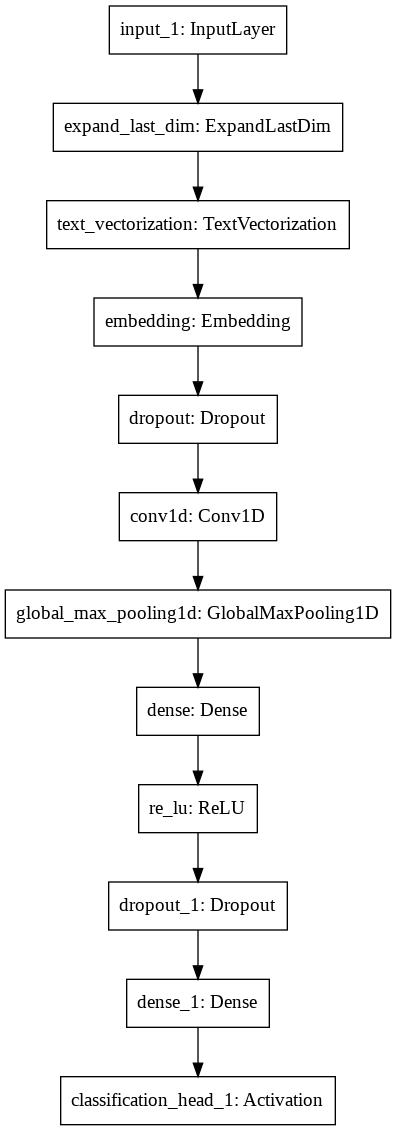

In [77]:
from tensorflow.keras.utils import plot_model
plot_model(keras_model)